In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_out+'train.csv')
test = pd.read_csv(filepath_out+'test_x.csv')

In [3]:
train.shape

(45532, 78)

In [4]:
test.shape

(11383, 77)

In [5]:
train.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [6]:
# 출력 데이터를 제외한 나머지 컬럼이 모두 동일한가 = okay
(train.columns.drop('voted') != test.columns).sum()

0

In [7]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [8]:
data.shape

(56915, 77)

In [9]:
data.dtypes.value_counts() # 대부분 양적 데이터

int64      53
float64    20
object      4
dtype: int64

# 10.13

In [10]:
personal_cols =['age_group','education','engnat','familysize','gender','hand','married','race','religion','urban']
Personal_info = data[personal_cols].copy()

### 연령대

In [11]:
Personal_info['age_group'].unique() # No NA

array(['30s', '20s', '40s', '50s', '10s', '60s', '+70s'], dtype=object)

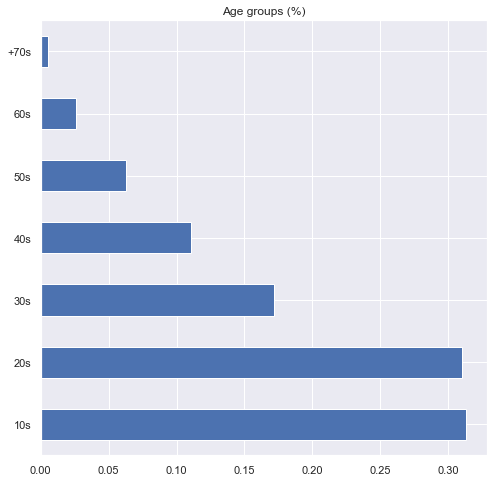

In [12]:
Personal_info.age_group.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Age groups (%)')

### 교육 수준

In [13]:
Personal_info.education.unique() # 0 = 무응답 = NA ?

array([2, 4, 3, 1, 0], dtype=int64)

In [14]:
(Personal_info.education==0).sum() # 무응답 : 650

650

[Text(0, 0, 'High school'),
 Text(0, 0, 'University degree'),
 Text(0, 0, 'Graduate degree'),
 Text(0, 0, 'Less than high school'),
 Text(0, 0, 'No reply')]

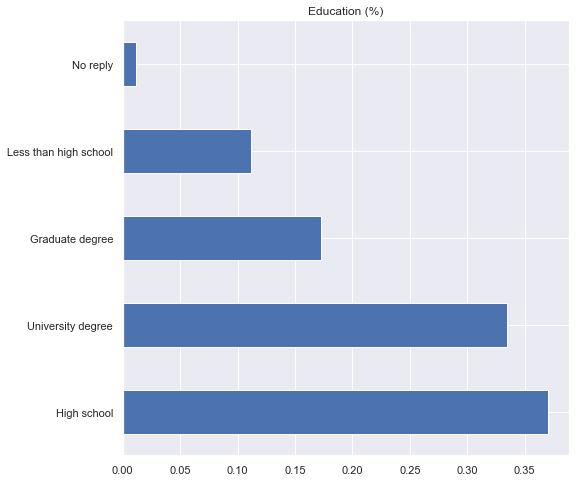

In [15]:
ax1 = Personal_info.education.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Education (%)')
ax1.set_yticklabels(['High school','University degree','Graduate degree','Less than high school','No reply'])

### 모국어 영어 여부

In [16]:
Personal_info.engnat.unique() # 무응답 존재

array([1, 2, 0], dtype=int64)

In [17]:
(Personal_info.engnat==0).sum() # 무응답 : 94

94

[Text(0, 0, 'YES'), Text(0, 0, 'NO'), Text(0, 0, 'No reply')]

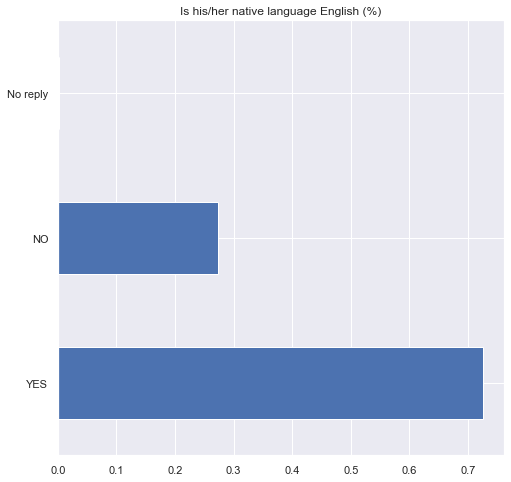

In [18]:
ax2 = Personal_info.engnat.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Is his/her native language English (%)')
ax2.set_yticklabels(['YES','NO','No reply'])

### 형제자매 수

In [19]:
Personal_info.familysize.unique() # 999? 100? 2147483647? 이상치로 보이는 셋 , 음수나 NA는 없음

array([         4,          3,          0,          2,          6,
                1,          5,          8,          7,          9,
              999,         11,         10,         15,         14,
               12,         21,         13,         20,         44,
               16, 2147483647,         17,        100,         34,
               30,         18,         23], dtype=int64)

In [20]:
Personal_info.familysize.value_counts()

2             22372
3             14092
1              8214
4              6144
5              2457
0              1504
6              1023
7               484
8               272
9               154
10               77
11               45
12               27
13               11
14               10
15                9
44                3
17                3
20                3
21                2
16                2
100               1
18                1
34                1
999               1
23                1
2147483647        1
30                1
Name: familysize, dtype: int64

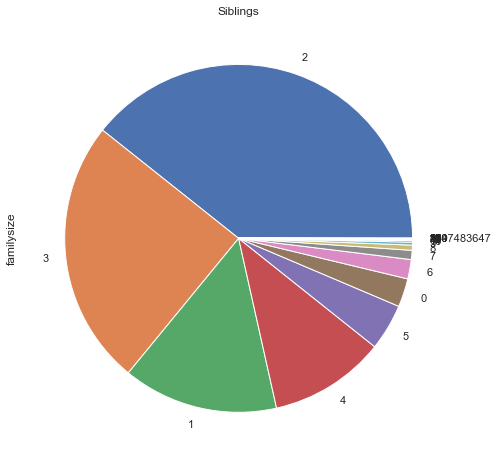

In [21]:
Personal_info.familysize.value_counts(normalize=True).plot(kind='pie',
                                                         figsize=(8,8),
                                                         title='Siblings')

### 성별

In [22]:
Personal_info.gender.unique() # No NA

array(['Female', 'Male'], dtype=object)

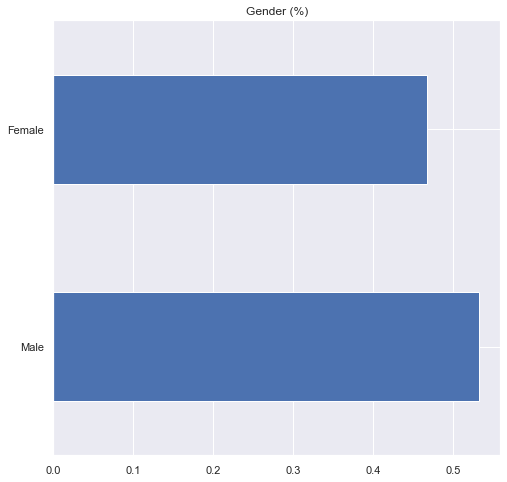

In [23]:
Personal_info.gender.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Gender (%)')

### 필기하는 손

In [24]:
Personal_info.hand.unique() # 무응답 존재

array([1, 2, 3, 0], dtype=int64)

In [25]:
(Personal_info.hand == 0).sum() # 무응답 : 201건

201

[Text(0, 0, 'Right handed'),
 Text(0, 0, 'Left handed'),
 Text(0, 0, 'Both handed'),
 Text(0, 0, 'No reply')]

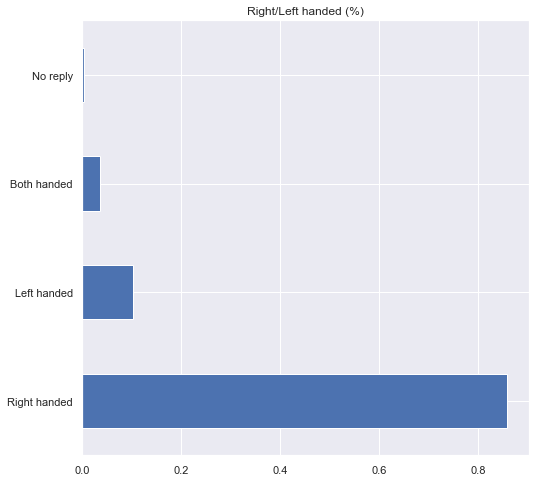

In [26]:
ax3 = Personal_info.hand.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Right/Left handed (%)')
ax3.set_yticklabels(['Right handed','Left handed','Both handed','No reply'])

### 결혼 여부

In [27]:
Personal_info.married.unique() # 무응답 존재

array([3, 1, 2, 0], dtype=int64)

In [28]:
(Personal_info.married==0).sum() # 무응답 :121 건

121

[Text(0, 0, 'Never married'),
 Text(0, 0, 'Currently married'),
 Text(0, 0, 'Previously married'),
 Text(0, 0, 'Other')]

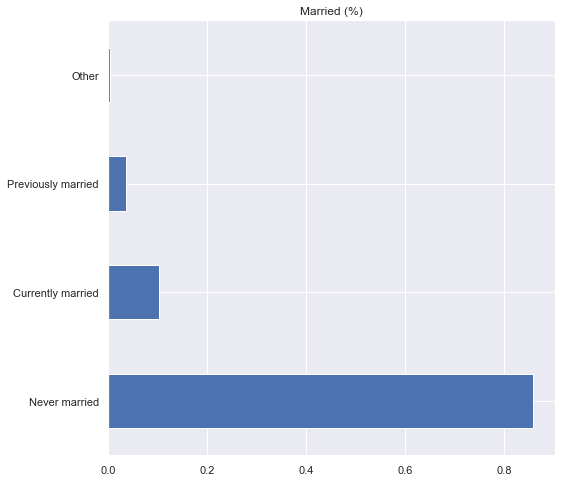

In [29]:
ax4 = Personal_info.hand.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Married (%)')
ax4.set_yticklabels(['Never married','Currently married','Previously married','Other'])

### 인종

In [30]:
Personal_info.race.unique() # No NA

array(['White', 'Asian', 'Other', 'Black', 'Native American', 'Arab',
       'Indigenous Australian'], dtype=object)

In [31]:
Personal_info.race.value_counts()

White                    39166
Asian                     8498
Other                     5383
Black                     2705
Native American            665
Arab                       434
Indigenous Australian       64
Name: race, dtype: int64

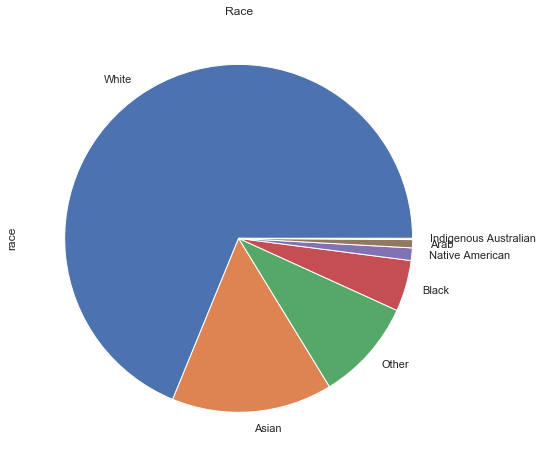

In [32]:
Personal_info.race.value_counts(normalize=True).plot(kind='pie',
                                                         figsize=(8,8),
                                                         title='Race',
                                                         )

### 종교

In [33]:
Personal_info.religion.unique() # No NA

array(['Other', 'Hindu', 'Agnostic', 'Atheist', 'Christian_Other',
       'Christian_Catholic', 'Muslim', 'Buddhist', 'Christian_Protestant',
       'Jewish', 'Christian_Mormon', 'Sikh'], dtype=object)

In [34]:
Personal_info.religion.value_counts()

Atheist                 12816
Agnostic                11933
Christian_Catholic       8014
Christian_Other          6488
Christian_Protestant     6071
Other                    5995
Hindu                    1772
Muslim                   1464
Buddhist                 1073
Jewish                    599
Christian_Mormon          540
Sikh                      150
Name: religion, dtype: int64

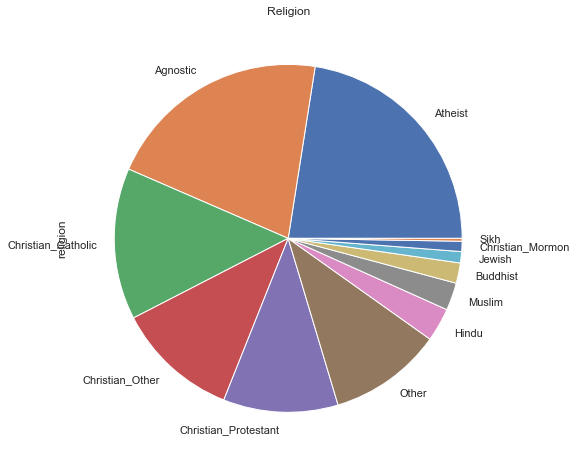

In [35]:
Personal_info.religion.value_counts(normalize=True).plot(kind='pie',
                                                         figsize=(8,8),
                                                         title='Religion')

### 유년기 거주 지역

In [36]:
Personal_info.urban.unique() # 무응답 존재

array([1, 3, 2, 0], dtype=int64)

In [37]:
Personal_info.urban.value_counts()

2    23085
3    22206
1    11208
0      416
Name: urban, dtype: int64

[Text(0, 0, 'Suburban'),
 Text(0, 0, 'Urban (town, city)'),
 Text(0, 0, 'Rural (country side)'),
 Text(0, 0, 'No reply')]

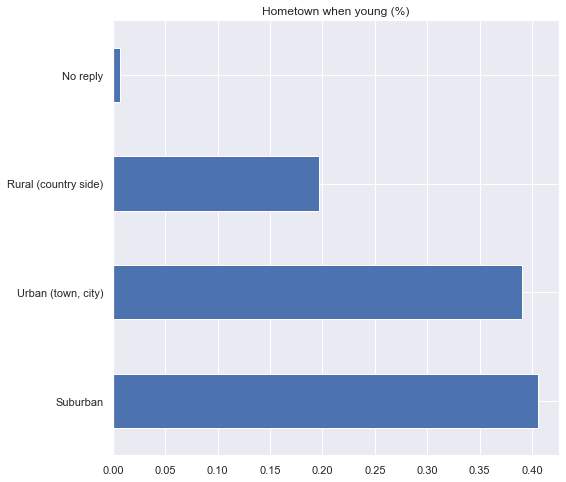

In [38]:
ax5 = Personal_info.urban.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Hometown when young (%)')
ax5.set_yticklabels(['Suburban','Urban (town, city)','Rural (country side)','No reply'])

# Summary
age_group : safe   
***
education : 650 NA  
***
engnat : 94 NA  
***
familysize : 3 outliers (2147483647 , 999 , 100)  
***
gender : safe  
***
hand : 201 NA  
***
married : 121 NA  
***
race : No NA , but rather huge 'Other' category (5383)  
***
religion : No NA , but rather huge 'Other' category (5995)  
***
urban : 416 NA

# 10.14

In [39]:
data.familysize.sort_values(ascending=False)[:3]

24598    2147483647
379             999
25661           100
Name: familysize, dtype: int64

In [40]:
# 각 행별로 무응답(0) 한 질문 수가 몇개씩 있나
row_zero_count = data[['education','engnat','hand','married','urban']].apply(lambda x:(x==0).sum(),axis=1)

In [41]:
# 1개라도 무응답 항목이 있는 행은 총 1432 개나 있는 반면,
row_zero_count[row_zero_count>0].sort_values(ascending=False)

45592    3
28918    2
24704    2
13494    2
3669     2
        ..
38400    1
38481    1
38500    1
38554    1
92       1
Length: 1432, dtype: int64

In [42]:
# 2개 이상 있는 행은 몇 개 없음 : 49개
row_zero_count[row_zero_count>1].sort_values(ascending=False)

45592    3
55920    2
13494    2
26041    2
25433    2
25011    2
24704    2
24103    2
21046    2
19984    2
17769    2
17061    2
15491    2
11254    2
26920    2
11197    2
9928     2
6727     2
5813     2
4113     2
3669     2
3422     2
3068     2
1100     2
26784    2
28318    2
53885    2
44421    2
53434    2
52945    2
51994    2
51407    2
51099    2
48729    2
48485    2
47705    2
44743    2
43475    2
28918    2
42001    2
38240    2
37385    2
36649    2
35442    2
33648    2
31542    2
30746    2
30076    2
746      2
dtype: int64

### 즉 , 무응답한 질문 수가 많은 설문자의 데이터는 과감히 버리려 했는데 딱히 그럴만한 데이터도 없네..

# Summary  
|name|status|remarks|
|:--:|:--:|:--:|
|age_group|safe|   |
|education|650 NA|  |
|engnat|94 NA|  |  
|familysize|3 outliers|(2147483647 , 999 , 100)|  
|gender|safe|  |
|hand|201 NA|  |
|married|121 NA|  |  
|race|No NA|but rather huge 'Other' category (5383)|  
|religion|No NA|but rather huge 'Other' category (5995)|  
|urban|416 NA|  |  

- rows with at least 1 `No reply (0)` : 1432
- rows with at more than 1 `No reply (0)` : 49

### 결측값을 개인정보끼리 관계로 예측가능한가 : heatmap

In [43]:
corr = pd.DataFrame(sample,columns=['education','engnat','hand','married','urban']).corr(method='spearman')

NameError: name 'sample' is not defined

In [ ]:
corr

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(corr,vmin=corr.min().min(),vmax=1,square=True,cmap='ocean')

# 택도없다!

In [44]:
data[['education','engnat','hand','married','urban']].dropna().corr(method='pearson')

education    engnat      hand   married     urban
education   1.000000  0.133836 -0.033611  0.241355 -0.010077
engnat      0.133836  1.000000 -0.032106 -0.115358  0.138914
hand       -0.033611 -0.032106  1.000000 -0.010756 -0.008659
married     0.241355 -0.115358 -0.010756  1.000000 -0.065273
urban      -0.010077  0.138914 -0.008659 -0.065273  1.000000

In [45]:
train.voted.value_counts()

2    24898
1    20634
Name: voted, dtype: int64